In [104]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## 4 wage equation #4
### 4.1 VIFs
Для набора данных `wage2` рассмотрим линейную регрессию


**log(wage) на age, age^2, IQ, married, south, urban.**

Какие регрессии нужно рассматривать для вычисления показателей VIF для коэффициентов
**age, age^2, urban**?

Ответ

- **age на age^2, IQ, married, south, urban**
- **age^2 на age, IQ, married, south, urban**
- **urban на age, age^2, IQ, married, south**


In [105]:
df_wage2 = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')
# data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/SwissLabor.csv')
df_wage2.shape

(935, 17)

In [106]:
# Модель log(wage) на age, age^2, IQ, married, south, urban
formula = 'np.log(wage)~age+I(age**2)+IQ+married+south+urban'
Wage2_eq41 = smf.ols(formula=formula, data=df_wage2).fit()

In [107]:
# Модель 1:  age на age^2, IQ, married, south, urban
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'age ~ I(age**2) + IQ + married + south + urban'
model_41 = smf.ols(formula=formula, data=df_wage2).fit()

In [108]:
# Модель 2: age^2 на age, IQ, married, south, urban
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'I(age**2)~age+IQ+married+south+urban'
model_42 = smf.ols(formula=formula, data=df_wage2).fit()

In [109]:
# Модель 3: urban на age, age^2, IQ, married, south
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'urban~age+I(age**2)+IQ+married+south'
model_43 = smf.ols(formula = formula, data = df_wage2).fit()

In [110]:
#Результаты подгонки
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'R-squared': lambda x: "%#8.3f" % x.rsquared,
             'Adj. R-squared': lambda x: "%#8.3f" % x.rsquared_adj,
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }

print(
    summary_col(
        [model_41, model_42, model_43],
        stars=True, float_format='%.3f',
        info_dict = info_dict
    )
)


                       age     I(age ** 2)    urban  
-----------------------------------------------------
I(age ** 2)         0.015***                -0.003   
                    (0.000)                 (0.002)  
IQ                  -0.000     0.008        0.000    
                    (0.000)    (0.018)      (0.001)  
Intercept           16.514***  -1096.784*** -2.337   
                    (0.039)    (3.612)      (1.963)  
R-squared           0.998      0.998        0.016    
R-squared Adj.      0.998      0.998        0.011    
age                            66.523***    0.188    
                               (0.087)      (0.118)  
married             -0.003     0.301        -0.053   
                    (0.013)    (0.879)      (0.048)  
south               0.010      -0.698       -0.102***
                    (0.009)    (0.586)      (0.032)  
urban               0.014      -0.962                
                    (0.009)    (0.603)               
No. Observations    935    

In [111]:
# VIF для age c округлением до 2-х десятичных знаков
# VIF_1 = 1/(1 - model_41.rsquared.round(3))
VIF_1 = 1/(1 - model_41.rsquared)
VIF_1.round(2)

632.87

In [112]:
# VIF для age**2 c округлением до 2-х десятичных знаков
# VIF_2 = 1/(1 - model_42.rsquared.round(3))
VIF_2 = 1/(1 - model_42.rsquared)
VIF_2.round(2)

632.96

In [113]:
# VIF для urban c округлением до 2-х десятичных знаков
VIF_3 = 1/(1 - model_43.rsquared.round(3))
VIF_3.round(2)

1.02

In [114]:
# names of exog
Wage2_eq41.model.exog_names

['Intercept', 'age', 'I(age ** 2)', 'IQ', 'married', 'south', 'urban']

In [115]:
# VIF для age c округлением до 2-х десятичных знаков
VIF_1 = variance_inflation_factor(exog = Wage2_eq41.model.exog, exog_idx = 1)
print('VIF for exog', Wage2_eq41.model.exog_names[1], ': ', VIF_1.round(2))

VIF for exog age :  632.87


In [116]:
# VIF для age**2 c округлением до 2-х десятичных знаков
VIF_2 = variance_inflation_factor(exog = Wage2_eq41.model.exog, exog_idx = 2)
print('VIF for exog', Wage2_eq41.model.exog_names[2], ': ', VIF_2.round(2))

VIF for exog I(age ** 2) :  632.96


In [117]:
# VIF для totwrk*south c округлением до 2-х десятичных знаков
VIF_3 = variance_inflation_factor(exog = Wage2_eq41.model.exog, exog_idx = 6)
print('VIF for exog', Wage2_eq41.model.exog_names[6], ': ', VIF_3.round(2))

VIF for exog urban :  1.02


### 4.2 Последствия

Для набора данных `wage` рассмотрим линейную регрессию
**log(wage) на age, age^2, IQ, married, south, urban.**

Результаты оценивания:


In [118]:
# Модель log(wage) на age, age^2, IQ, married, south, urban.
formula = 'np.log(wage)~age+I(age**2)+IQ+married+south+urban'
Wage_eq42 = smf.ols(formula = formula, data = df_wage2).fit()


In [119]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(Wage_eq42)
print(summary_col(Wage_eq42, float_format='%.3f', stars=True, info_dict = info_dict))


                    np.log(wage)
--------------------------------
Intercept           2.938*      
                    (1.656)     
age                 0.145       
                    (0.100)     
I(age ** 2)         -0.002      
                    (0.002)     
IQ                  0.008***    
                    (0.001)     
married             0.202***    
                    (0.040)     
south               -0.100***   
                    (0.027)     
urban               0.173***    
                    (0.028)     
R-squared           0.201       
R-squared Adj.      0.196       
No. Observations    935         
Residual Std. Error 0.378       
F-statistic         38.898      
Prob (F-statistic)  0.000       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [120]:
# Уровень значимости 5%
alpha = 0.05
df = summary_params(Wage_eq42, alpha=alpha)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<alpha else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,2.937802,1.656234,1.773784,7.642669e-02,-0.312596,6.188201,Незначим
age,0.144754,0.100033,1.447058,1.482184e-01,-0.051564,0.341072,Незначим
I(age ** 2),-0.001857,0.001503,-1.235591,2.169233e-01,-0.004805,0.001092,Незначим
IQ,0.008216,0.000841,9.769940,1.584051e-21,0.006566,0.009866,Значим
married,0.201539,0.040240,5.008445,6.567021e-07,0.122567,0.280510,Значим
south,-0.100273,0.026838,-3.736230,1.982067e-04,-0.152944,-0.047603,Значим
urban,0.173195,0.027667,6.259939,5.878259e-10,0.118897,0.227492,Значим


#### На уровне значимости 5% значимы коэффициенты: IQ, married, south, urban

#### Тестируется значимость влияния занятости, т.е. гипотеза
#### $H_0:\beta_{age}=\beta_{age^2}=0$.

In [121]:
# тестовая F_stat
f_stat = Wage_eq42.f_test('age = I(age ** 2) = 0').fvalue
print(f'F_stat = {f_stat:3.3f}')

F_stat = 14.833


In [122]:
# критическое значение F_crit
# alpha=0.1
f_crit = scipy.stats.f.ppf(1-alpha, 2, 700).round(2)
print(f'F_crit = {f_crit:3.3f}')

F_crit = 3.010


### Так как F_stat > F_crit, то гипотеза отвергается. Значит коэффициенты совместно значимы

In [123]:
#VIFs
VIFS = pd.DataFrame(
    {'VIF': [variance_inflation_factor(
                                          Wage_eq42.model.exog, i
                                      ) for i in range(int(Wage_eq42.df_model+1))
            ]
    }, index=Wage_eq42.model.exog_names
)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
age,632.868517
I(age ** 2),632.964483
IQ,1.049260
married,1.013807
south,1.061287
urban,1.016749


In [124]:
# Матрица корреляций
df_corr = df_wage2[['age', 'IQ', 'married', 'south', 'urban']].copy()
df_corr['age**2'] = df_corr['age'] ** 2
# df_sleep['I(totwrk ** 2 / 10000)'] = (data_sleep['totwrk']**2)/10000
corr_matrix = df_corr.corr().round(3)
corr_matrix

,age,IQ,married,south,urban,age**2
age,1.000,-0.044,0.107,-0.029,-0.007,0.999
IQ,-0.044,1.000,-0.015,-0.210,0.039,-0.043
married,0.107,-0.015,1.000,0.023,-0.040,0.107
south,-0.029,-0.210,0.023,1.000,-0.110,-0.031
urban,-0.007,0.039,-0.040,-0.110,1.000,-0.009
age**2,0.999,-0.043,0.107,-0.031,-0.009,1.000


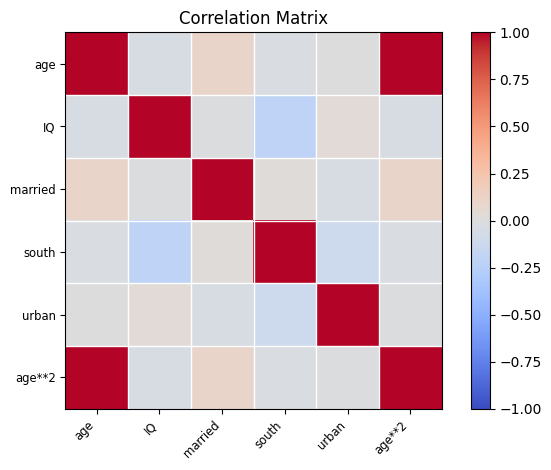

In [125]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df_corr.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

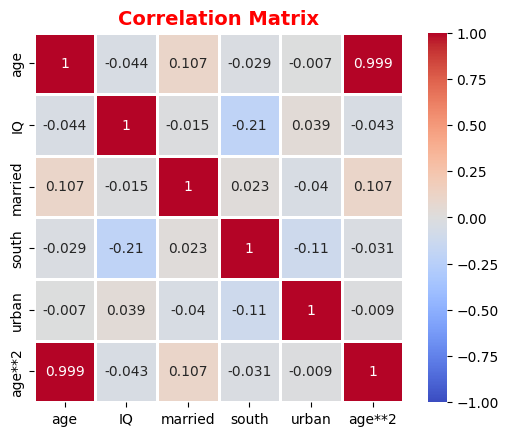

In [126]:
# Визуализация корреляций
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

### "Продвинутая" визуализация корреляций

Text(0.5, 1.0, 'Correlation Matrix')

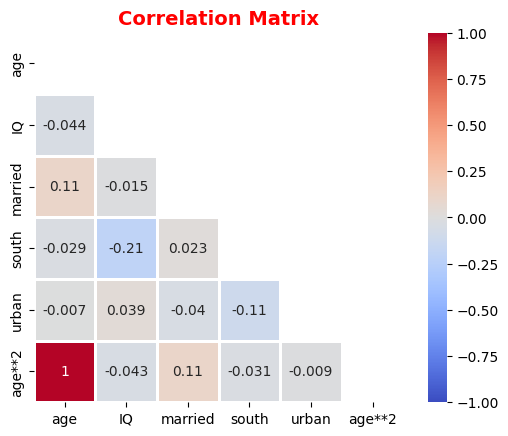

In [127]:
corr_matrix = df_corr.corr().round(3)
# нижнетреугольная матрица корреляций
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

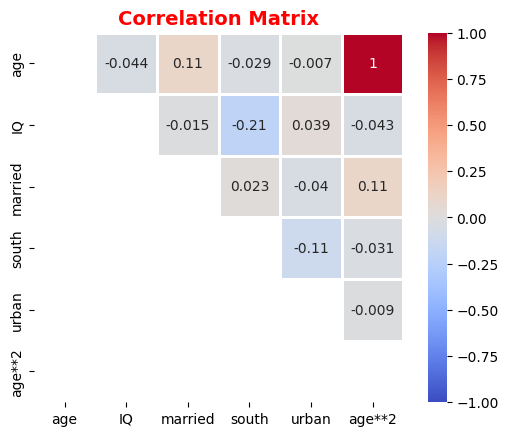

In [128]:
corr_matrix = df_corr.corr().round(3)
# верхнетреугольная матрица корреляций
mask = np.tril(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

In [129]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .set_properties(**{'text-align': 'center'})
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2, na_rep=" ")
 .set_caption('Correlation Matrix'))

,age,IQ,married,south,urban,age**2
age,,,,,,
IQ,-0.04,,,,,
married,0.11,-0.01,,,,
south,-0.03,-0.21,0.02,,,
urban,-0.01,0.04,-0.04,-0.11,,
age**2,1.00,-0.04,0.11,-0.03,-0.01,
